<a href="https://colab.research.google.com/github/EphemeralAnarchist/ASL_Translator/blob/main/ASLTranslator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Setting google drive as a directory for dataset
from google.colab import drive 
drive.mount('/content/gdrive')
dir_path = "gdrive/MyDrive/Colab Notebooks/dataset"

Mounted at /content/gdrive


In [2]:
import os
for dirname, _, filenames in os.walk(dir_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

gdrive/MyDrive/Colab Notebooks/dataset/amer_sign2.png
gdrive/MyDrive/Colab Notebooks/dataset/sign_mnist_test.csv
gdrive/MyDrive/Colab Notebooks/dataset/american_sign_language.PNG
gdrive/MyDrive/Colab Notebooks/dataset/amer_sign3.png
gdrive/MyDrive/Colab Notebooks/dataset/sign_mnist_train.csv
gdrive/MyDrive/Colab Notebooks/dataset/sign_mnist_train/sign_mnist_train.csv
gdrive/MyDrive/Colab Notebooks/dataset/sign_mnist_test/sign_mnist_test.csv
gdrive/MyDrive/Colab Notebooks/dataset/sign_mnist_test/ASL_A.jpg


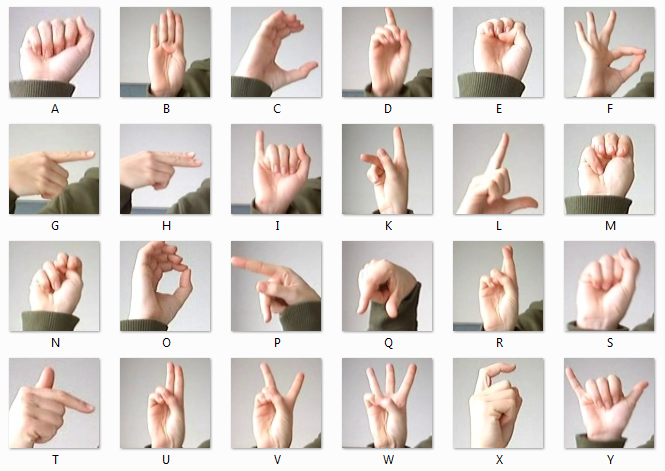

In [3]:
from IPython.display import Image
Image('gdrive/MyDrive/Colab Notebooks/dataset/amer_sign2.png')

In [4]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [5]:
train = pd.read_csv('gdrive/MyDrive/Colab Notebooks/dataset/sign_mnist_train.csv')
test = pd.read_csv('gdrive/MyDrive/Colab Notebooks/dataset/sign_mnist_test.csv')

In [6]:
print(train.shape)
print(test.shape)


(27455, 785)
(7172, 785)


In [7]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [8]:
# Create training and testing arrays
train_set = np.array(train, dtype = 'float32')
test_set = np.array(test, dtype='float32')

In [9]:
#Specifying class labels
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

(-0.5, 27.5, 27.5, -0.5)

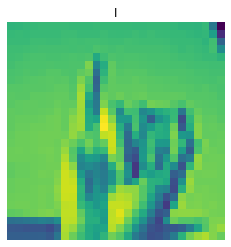

In [10]:
#See a random image for class label verification
i = random.randint(1,27455)
plt.imshow(train_set[i,1:].reshape((28,28))) 
plt.imshow(train_set[i,1:].reshape((28,28))) 
label_index = train["label"][i]
plt.title(f"{class_names[label_index]}")
plt.axis('off')

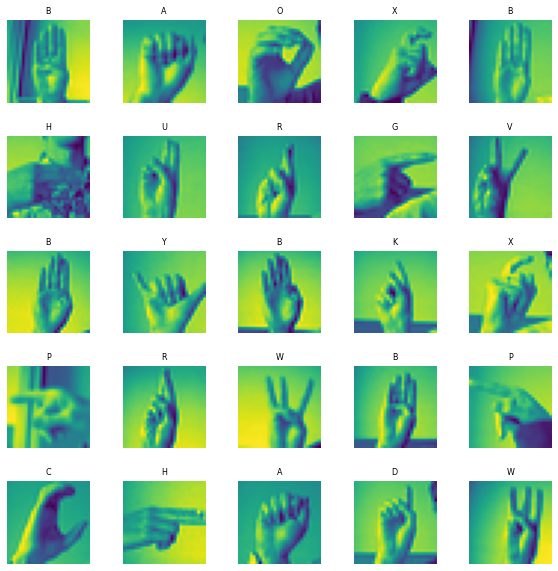

In [11]:
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5
fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_train = len(train_set) # get the length of the train dataset
# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 
    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow( train_set[index,1:].reshape((28,28)) )
    label_index = int(train_set[index,0])
    axes[i].set_title(class_names[label_index], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

In [12]:
# Prepare the training and testing dataset 
X_train = train_set[:, 1:] / 255
y_train = train_set[:, 0]

X_test = test_set[:, 1:] / 255
y_test = test_set[:,0]

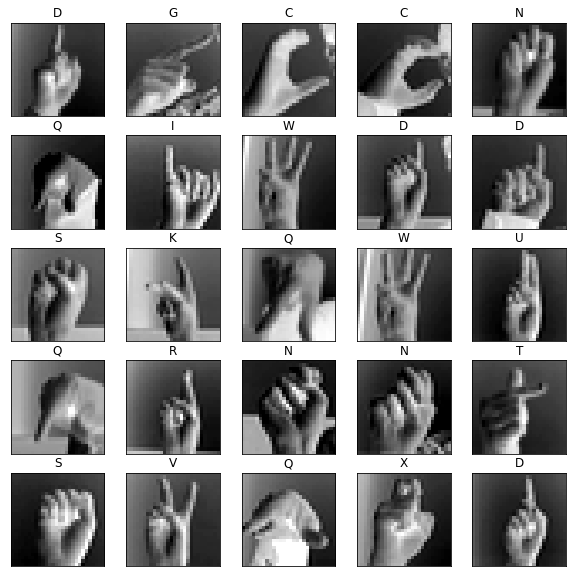

In [13]:
#Visualize train images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28,28)), cmap=plt.cm.binary)
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

In [14]:
#Split the training and test sets
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [15]:
print(X_train.shape)
print(y_train.shape)

(21964, 784)
(21964,)


In [16]:
# Unpack the training and test tuple
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)

(21964, 28, 28, 1)
(21964,)
(5491, 28, 28, 1)


### CNN

In [17]:
!pip install keras

In [18]:
#Library for CNN Model
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
# from keras.optimizers import Adam
from keras.optimizers import adam_v2
# optimizer = adam_v2.Adam(learning_rate=lr, decay=lr/epochs)
# Model.compile(loss='--',  optimizer=optimizer  , metrics=['--'])
from keras.callbacks import TensorBoard

#Defining the Convolutional Neural Network
cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(units = 25, activation = 'softmax'))

In [19]:
#CNN Model Summary
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [20]:
#Compiling
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])

In [21]:
#Training the CNN model
history = cnn_model.fit(X_train, y_train, batch_size = 512, epochs = 50, verbose = 1, validation_data = (X_validate, y_validate))

Epoch 1/50
43/43 [==============================] - 15s 45ms/step - loss: 3.1707 - accuracy: 0.0558 - val_loss: 3.0666 - val_accuracy: 0.1067
Epoch 2/50
43/43 [==============================] - 1s 29ms/step - loss: 2.7036 - accuracy: 0.1654 - val_loss: 2.2743 - val_accuracy: 0.2972
Epoch 3/50
43/43 [==============================] - 1s 28ms/step - loss: 2.0310 - accuracy: 0.3326 - val_loss: 1.5950 - val_accuracy: 0.4981
Epoch 4/50
43/43 [==============================] - 1s 30ms/step - loss: 1.5328 - accuracy: 0.4848 - val_loss: 1.0691 - val_accuracy: 0.6600
Epoch 5/50
43/43 [==============================] - 1s 30ms/step - loss: 1.1620 - accuracy: 0.6000 - val_loss: 0.7563 - val_accuracy: 0.7802
Epoch 6/50
43/43 [==============================] - 1s 30ms/step - loss: 0.9067 - accuracy: 0.6865 - val_loss: 0.5446 - val_accuracy: 0.8428
Epoch 7/50
43/43 [==============================] - 1s 28ms/step - loss: 0.7430 - accuracy: 0.7427 - val_loss: 0.4179 - val_accuracy: 0.8778
Epoch 8/50
4

Text(0.5, 1.0, 'Accuracy evolution')

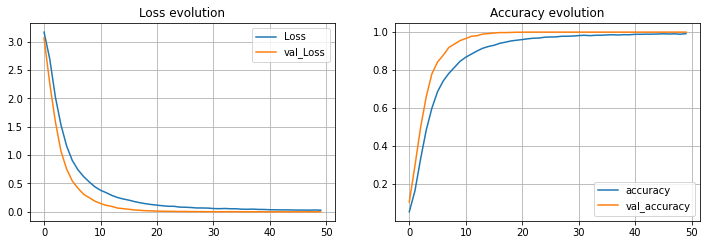

In [22]:
#Visualizing the training performance
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')

In [23]:
#Predictions for the test data
# predicted_classes = cnn_model.predict_classes(X_test)
predict_x=cnn_model.predict(X_test) 
# classes_x=np.argmax(predict_x,axis=1)
predicted_classes=np.argmax(predict_x,axis=1)

In [24]:
X_test[0].shape

(28, 28, 1)

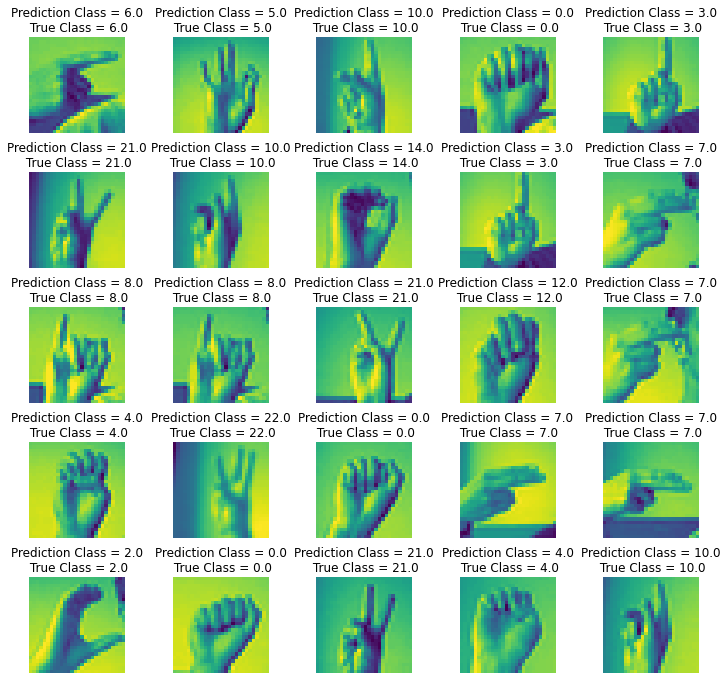

In [25]:
#Visualize predictions
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]:0.1f}\n True Class = {y_test[i]:0.1f}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predicted_classes)

In [27]:
#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Computing confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

# Visualizing
    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

   # Rotating the tick labels and setting their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Looping over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
np.set_printoptions(precision=2)

Confusion matrix, without normalization


<Figure size 1440x1440 with 0 Axes>

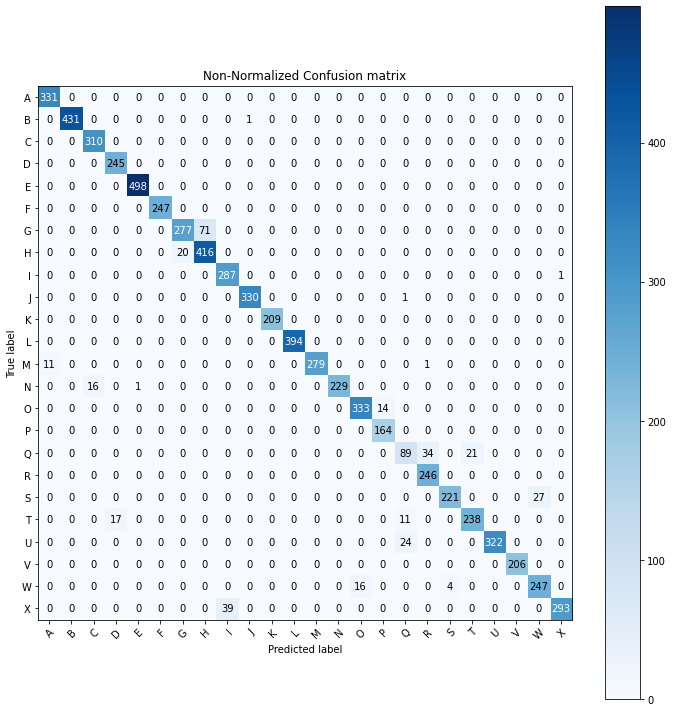

In [28]:
#Specifying class labels
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

#Non-Normalized Confusion Matrix
plt.figure(figsize=(20,20))
plot_confusion_matrix(y_test, predicted_classes, classes = class_names, title='Non-Normalized Confusion matrix')
plt.show()

Normalized confusion matrix


<Figure size 2520x2520 with 0 Axes>

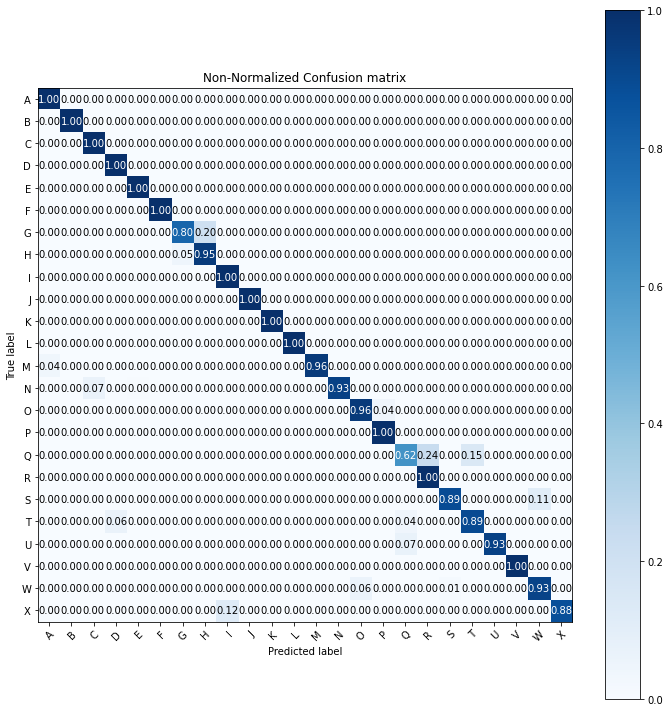

In [29]:
#Normalized Confusion Matrix
plt.figure(figsize=(35,35))
plot_confusion_matrix(y_test, predicted_classes, classes = class_names, normalize=True, title='Non-Normalized Confusion matrix')
plt.show()

In [30]:
#Classification accuracy
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, predicted_classes)
print('Accuracy Score = ',acc_score)

Accuracy Score =  0.9539877300613497


###Prediction

In [82]:
text=""

In [83]:
#capturing image
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from keras.preprocessing import image
from PIL import Image

img1 = image.load_img("gdrive/MyDrive/Colab Notebooks/predict/ASL_C.png", target_size = (28,28))
img = np.array(img1).reshape( 28, 28, 3)
plt.gray()

<Figure size 432x288 with 0 Axes>

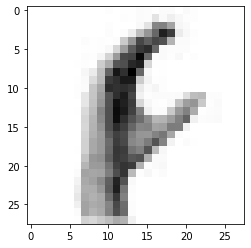

In [84]:
rgb_weights = [0.2989, 0.5870, 0.1140]
grayscale_image = np.dot(img[...,:3], rgb_weights)
plt.imshow(grayscale_image, cmap=plt.get_cmap("gray"))

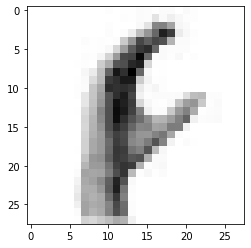

In [85]:
imgarr=np.array(grayscale_image.reshape(1,28,28,1))
imgarr.shape
plt.imshow(imgarr[0].reshape((28,28)))

In [86]:
imgarr.shape

(1, 28, 28, 1)

In [87]:
#Predictions for the actual data
predict_img=cnn_model.predict(imgarr)
predicted=np.argmax(predict_img,axis=1)
print(class_names[predicted[0]])
text+=class_names[predicted[0]]

C


O


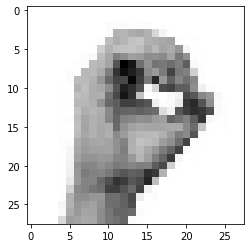

In [88]:
img1 = image.load_img("gdrive/MyDrive/Colab Notebooks/predict/ASL_O.png", target_size = (28,28))
img = np.array(img1).reshape( 28, 28, 3)
plt.gray()

rgb_weights = [0.2989, 0.5870, 0.1140]
grayscale_image = np.dot(img[...,:3], rgb_weights)
plt.imshow(grayscale_image, cmap=plt.get_cmap("gray"))

imgarr=np.array(grayscale_image.reshape(1,28,28,1))
predict_img=cnn_model.predict(imgarr)
predicted=np.argmax(predict_img,axis=1)
print(class_names[predicted[0]])
text+=class_names[predicted[0]]

O


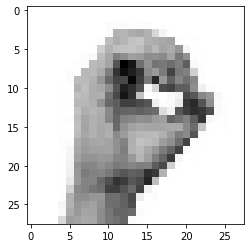

In [89]:
img1 = image.load_img("gdrive/MyDrive/Colab Notebooks/predict/ASL_O.png", target_size = (28,28))
img = np.array(img1).reshape( 28, 28, 3)
plt.gray()

rgb_weights = [0.2989, 0.5870, 0.1140]
grayscale_image = np.dot(img[...,:3], rgb_weights)
plt.imshow(grayscale_image, cmap=plt.get_cmap("gray"))

imgarr=np.array(grayscale_image.reshape(1,28,28,1))
predict_img=cnn_model.predict(imgarr)
predicted=np.argmax(predict_img,axis=1)
print(class_names[predicted[0]])
text+=class_names[predicted[0]]

L


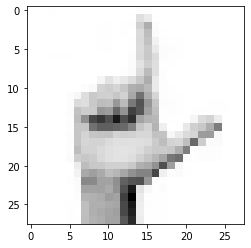

In [90]:
img1 = image.load_img("gdrive/MyDrive/Colab Notebooks/predict/ASL_L.png", target_size = (28,28))
img = np.array(img1).reshape( 28, 28, 3)
plt.gray()

rgb_weights = [0.2989, 0.5870, 0.1140]
grayscale_image = np.dot(img[...,:3], rgb_weights)
plt.imshow(grayscale_image, cmap=plt.get_cmap("gray"))

imgarr=np.array(grayscale_image.reshape(1,28,28,1))
predict_img=cnn_model.predict(imgarr)
predicted=np.argmax(predict_img,axis=1)
print(class_names[predicted[0]])
text+=class_names[predicted[0]]

C


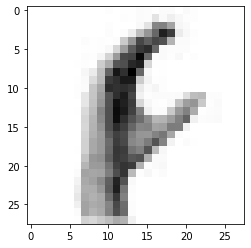

In [91]:
img1 = image.load_img("gdrive/MyDrive/Colab Notebooks/predict/ASL_C.png", target_size = (28,28))
img = np.array(img1).reshape( 28, 28, 3)
plt.gray()

rgb_weights = [0.2989, 0.5870, 0.1140]
grayscale_image = np.dot(img[...,:3], rgb_weights)
plt.imshow(grayscale_image, cmap=plt.get_cmap("gray"))

imgarr=np.array(grayscale_image.reshape(1,28,28,1))
predict_img=cnn_model.predict(imgarr)
predicted=np.argmax(predict_img,axis=1)
print(class_names[predicted[0]])
text+=class_names[predicted[0]]

O


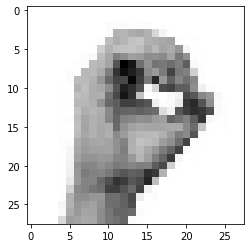

In [92]:
img1 = image.load_img("gdrive/MyDrive/Colab Notebooks/predict/ASL_O.png", target_size = (28,28))
img = np.array(img1).reshape( 28, 28, 3)
plt.gray()

rgb_weights = [0.2989, 0.5870, 0.1140]
grayscale_image = np.dot(img[...,:3], rgb_weights)
plt.imshow(grayscale_image, cmap=plt.get_cmap("gray"))

imgarr=np.array(grayscale_image.reshape(1,28,28,1))
predict_img=cnn_model.predict(imgarr)
predicted=np.argmax(predict_img,axis=1)
print(class_names[predicted[0]])
text+=class_names[predicted[0]]

A


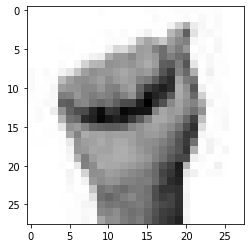

In [93]:
img1 = image.load_img("gdrive/MyDrive/Colab Notebooks/predict/ASL_A.png", target_size = (28,28))
img = np.array(img1).reshape( 28, 28, 3)
plt.gray()

rgb_weights = [0.2989, 0.5870, 0.1140]
grayscale_image = np.dot(img[...,:3], rgb_weights)
plt.imshow(grayscale_image, cmap=plt.get_cmap("gray"))

imgarr=np.array(grayscale_image.reshape(1,28,28,1))
predict_img=cnn_model.predict(imgarr)
predicted=np.argmax(predict_img,axis=1)
print(class_names[predicted[0]])
text+=class_names[predicted[0]]

L


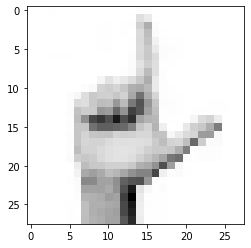

In [94]:
img1 = image.load_img("gdrive/MyDrive/Colab Notebooks/predict/ASL_L.png", target_size = (28,28))
img = np.array(img1).reshape( 28, 28, 3)
plt.gray()

rgb_weights = [0.2989, 0.5870, 0.1140]
grayscale_image = np.dot(img[...,:3], rgb_weights)
plt.imshow(grayscale_image, cmap=plt.get_cmap("gray"))

imgarr=np.array(grayscale_image.reshape(1,28,28,1))
predict_img=cnn_model.predict(imgarr)
predicted=np.argmax(predict_img,axis=1)
print(class_names[predicted[0]])
text+=class_names[predicted[0]]

In [95]:
print(text)

COOLCOAL


### NLP Spacing

In [96]:
from math import log

# Build a cost dictionary, assuming Zipf's law and cost = -math.log(probability).
words = open("gdrive/MyDrive/Colab Notebooks/NLP/words-by-frequency.txt").read().split()
wordcost = dict((k, log((i+1)*log(len(words)))) for i,k in enumerate(words))
maxword = max(len(x) for x in words)

def infer_spaces(s):
    """Uses dynamic programming to infer the location of spaces in a string
    without spaces."""

    # Find the best match for the i first characters, assuming cost has
    # been built for the i-1 first characters.
    # Returns a pair (match_cost, match_length).
    def best_match(i):
        candidates = enumerate(reversed(cost[max(0, i-maxword):i]))
        return min((c + wordcost.get(s[i-k-1:i], 9e999), k+1) for k,c in candidates)

    # Build the cost array.
    cost = [0]
    for i in range(1,len(s)+1):
        c,k = best_match(i)
        cost.append(c)

    # Backtrack to recover the minimal-cost string.
    out = []
    i = len(s)
    while i>0:
        c,k = best_match(i)
        assert c == cost[i]
        out.append(s[i-k:i])
        i -= k

    return " ".join(reversed(out))

In [97]:
text = text.lower()
text = infer_spaces(text)
print(text)

cool coal


###Text to Speech

In [98]:
!pip install gtts

In [99]:
# to speech conversion
from gtts import gTTS

# os is imported so that we can play the converted audio
import os

ASLtext = text

# We are converting the text into three Languages
language = 'en'
language1 = 'fr'
language2 = 'es'

# Passing the text and language to the engine, here we have marked slow=Ture. Which tells
# the module that the converted audio should have a slow speed
speech1 = gTTS(text=ASLtext, lang=language, slow=True)
speech2 = gTTS(text=ASLtext, lang=language1, slow=True)
speech3 = gTTS(text=ASLtext, lang=language2, slow=True)
# Saving the converted audio in a mp3 file named ASLtoTTS
speech1.save("gdrive/MyDrive/Colab Notebooks/speech/ASLtoTTS.mp3")
speech2.save("gdrive/MyDrive/Colab Notebooks/speech/ASLtoTTSfr.mp3")
speech3.save("gdrive/MyDrive/Colab Notebooks/speech/ASLtoTTSes.mp3")